# Probability distribution problems

## Binomial distribution

In probability theory and statistics, the binomial distribution is the discrete probability distribution that gives only two possible results in an experiment; for example, when you flip a coin, it can be either head or tails.

In [26]:
from scipy.stats import binom

# Define all the probability functions related to this distribution

def dbinom(x, size, prob = 0.5):
    """
    Calculates the point estimate of the binomial distribution
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calculates the cumulative of the binomial distribution
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calculates the quantile function from the binomial distribution
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Generates random variables from the binomial distribution
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [27]:
# Binomial(10, 0.2) distribution, where n = 10 is the number of trials and p = 0.2 is the probability of success in a single trial
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


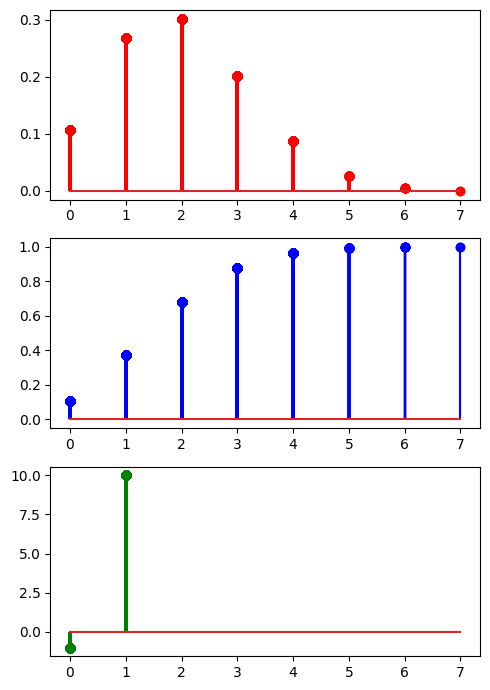

In [28]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Exercise 1

Write the above functions but for both normal and uniform distributions.

--- NORMAL DISTRIBUTION RESULTS ---
Density at value 2: 0.05399096651318806
Prob value is less than 2: 0.9772498680518208
Value at cumulative prob 0.9: 1.2815515655446004
Random values: [ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337]

--- UNIFORM DISTRIBUTION RESULTS ---
Density at value 0.5: 1.0
Prob value is less than 0.5: 0.5
Value at cumulative prob 0.9: 0.9
Random values: [0.05808361 0.86617615 0.60111501 0.70807258 0.02058449]



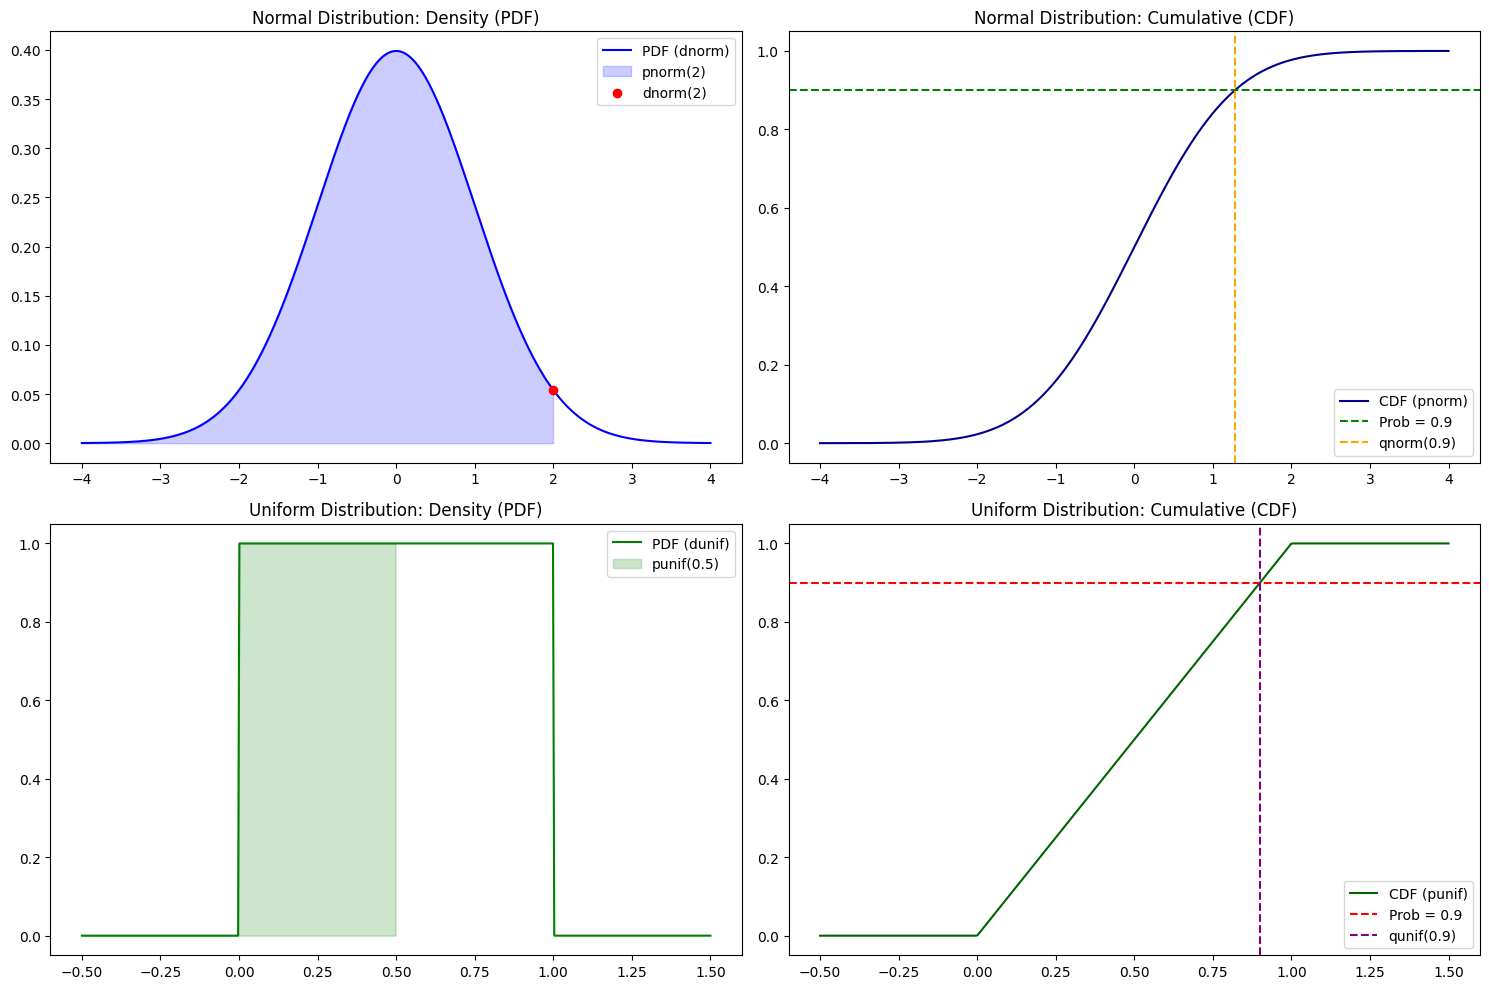

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

def dnorm(x): return norm.pdf(x, 0, 1)
def pnorm(q): return norm.cdf(q, 0, 1)
def qnorm(p): return norm.ppf(p, 0, 1)
def rnorm(n): return norm.rvs(0, 1, size=n)

def dunif(x): return uniform.pdf(x, 0, 1)
def punif(q): return uniform.cdf(q, 0, 1)
def qunif(p): return uniform.ppf(p, 0, 1)
def runif(n): return uniform.rvs(0, 1, size=n)

def flip_coin(method='uniform'):
    if method == 'uniform':
        val = runif(1)[0]
        return "Tails" if punif(val) < 0.5 else "Heads"
    elif method == 'normal':
        val = rnorm(1)[0]
        return "Tails" if pnorm(val) < 0.5 else "Heads"

np.random.seed(42)

# --- Calculation Outputs ---
print("--- NORMAL DISTRIBUTION RESULTS ---")
print(f"Density at value 2: {dnorm(2)}")
print(f"Prob value is less than 2: {pnorm(2)}")
print(f"Value at cumulative prob 0.9: {qnorm(0.9)}")
print(f"Random values: {rnorm(5)}\n")

print("--- UNIFORM DISTRIBUTION RESULTS ---")
print(f"Density at value 0.5: {dunif(0.5)}")
print(f"Prob value is less than 0.5: {punif(0.5)}")
print(f"Value at cumulative prob 0.9: {qunif(0.9)}")
print(f"Random values: {runif(5)}\n")

# --- Visualization Logic ---
x_norm = np.linspace(-4, 4, 500)
x_unif = np.linspace(-0.5, 1.5, 500)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Normal PDF
axes[0, 0].plot(x_norm, dnorm(x_norm), color='blue', label='PDF (dnorm)')
axes[0, 0].fill_between(x_norm, dnorm(x_norm), where=(x_norm <= 2), color='blue', alpha=0.2, label='pnorm(2)')
axes[0, 0].scatter([2], [dnorm(2)], color='red', zorder=5, label='dnorm(2)')
axes[0, 0].set_title('Normal Distribution: Density (PDF)')
axes[0, 0].legend()

# Normal CDF
axes[0, 1].plot(x_norm, pnorm(x_norm), color='darkblue', label='CDF (pnorm)')
axes[0, 1].axhline(0.9, color='green', linestyle='--', label='Prob = 0.9')
axes[0, 1].axvline(qnorm(0.9), color='orange', linestyle='--', label='qnorm(0.9)')
axes[0, 1].set_title('Normal Distribution: Cumulative (CDF)')
axes[0, 1].legend()

# Uniform PDF
axes[1, 0].plot(x_unif, dunif(x_unif), color='green', label='PDF (dunif)')
axes[1, 0].fill_between(x_unif, dunif(x_unif), where=(x_unif <= 0.5), color='green', alpha=0.2, label='punif(0.5)')
axes[1, 0].set_title('Uniform Distribution: Density (PDF)')
axes[1, 0].legend()

# Uniform CDF
axes[1, 1].plot(x_unif, punif(x_unif), color='darkgreen', label='CDF (punif)')
axes[1, 1].axhline(0.9, color='red', linestyle='--', label='Prob = 0.9')
axes[1, 1].axvline(qunif(0.9), color='purple', linestyle='--', label='qunif(0.9)')
axes[1, 1].set_title('Uniform Distribution: Cumulative (CDF)')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('distribution_visuals.png')